In [3]:
#import and load planned packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
#load and read data

data = pd.read_csv('used_cars_UK-c2.xls')
pd.set_option('display.max_columns', 25)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB


In [5]:
data.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [6]:
data.describe()

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [7]:
# column headers remove spaces and transform to lowercase 
data.columns = data.columns.str.replace(' ', '_')
data.columns = map(str.lower, data.columns)
data.head()

,unnamed:_0,title,price,mileage(miles),registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [8]:
# Add car age based on registraition year 
import datetime
date = datetime.date.today()
data['age'] = datetime.datetime.now().year - data['registration_year']

data.head()

,unnamed:_0,title,price,mileage(miles),registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,age
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,8
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,16
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,13
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,14
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,11


In [9]:
#cleansing & transformation

#remove 'L' engine#
data["engine"] = [str(x).replace('L','') for x in data["engine"]]
data["engine"] = [str(x).replace('nan','') for x in data["engine"]]
data["engine"] = pd.to_numeric(data["engine"])

#remove 'Euro' emission
data["emission_class"] = [str(x).replace('Euro ','') for x in data["emission_class"]]
data["emission_class"] = [str(x).replace('nan','') for x in data["emission_class"]]
data["emission_class"] = pd.to_numeric(data["emission_class"])



In [10]:
#seperate car make and model 
#new data frame with split value columns
new = data["title"].str.split(" ", n=1, expand=True)

#making separate first name column from new data frame
data["make"] = new[0]
data.head()

,unnamed:_0,title,price,mileage(miles),registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,age,make
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,8,SKODA
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,16,Vauxhall
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,13,Hyundai
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,14,MINI
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,11,Vauxhall


In [11]:
# One-Hot Encoding for new 'make' column
df_enc = pd.get_dummies(data, columns=['make'])
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed:_0          3685 non-null   int64  
 1   title               3685 non-null   object 
 2   price               3685 non-null   int64  
 3   mileage(miles)      3685 non-null   int64  
 4   registration_year   3685 non-null   int64  
 5   previous_owners     2276 non-null   float64
 6   fuel_type           3685 non-null   object 
 7   body_type           3685 non-null   object 
 8   engine              3640 non-null   float64
 9   gearbox             3685 non-null   object 
 10  doors               3660 non-null   float64
 11  seats               3650 non-null   float64
 12  emission_class      3598 non-null   float64
 13  service_history     540 non-null    object 
 14  age                 3685 non-null   int64  
 15  make_Abarth         3685 non-null   bool   
 16  make_A

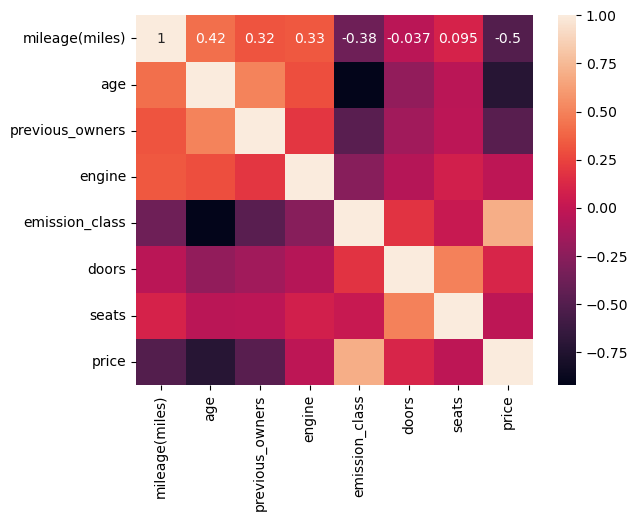

In [12]:
#check correlation plot#
data_corr = data[[ 'mileage(miles)', 'age', 'previous_owners', 'engine', 'emission_class', 'doors', 'seats', 'price']]
cc = sns.heatmap(data_corr.corr(), annot=True)

D:\Users\ecasw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price distribution')

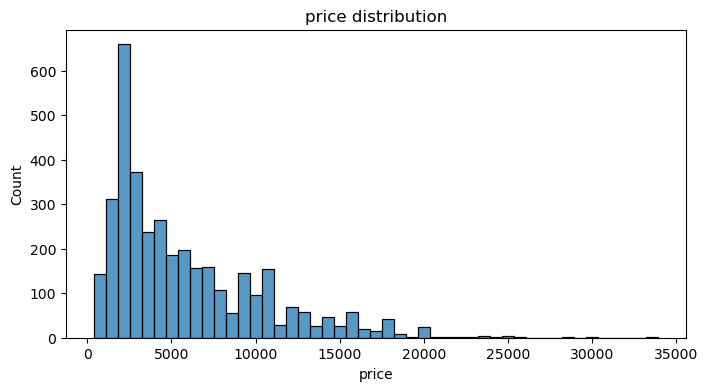

In [13]:
#check price distribution
fig=plt.figure(figsize=(8,4))
sns.histplot(data_corr['price'])
plt.title('price distribution')

In [14]:
#drop unused variables#
data_c = df_enc.drop(columns=['unnamed:_0', 'title', 'registration_year', 'fuel_type', 'body_type', 'gearbox', 'service_history'])
data_c.head()

,price,mileage(miles),previous_owners,engine,doors,seats,emission_class,age,make_Abarth,make_Alfa,make_Audi,make_BMW,...,make_Rover,make_SEAT,make_SKODA,make_Saab,make_Smart,make_Ssangyong,make_Subaru,make_Suzuki,make_Toyota,make_Vauxhall,make_Volkswagen,make_Volvo
0,6900,70189,3.0,1.4,5.0,5.0,6.0,8,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False
1,1495,88585,4.0,1.2,3.0,5.0,4.0,16,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False
2,949,137000,NaN,1.4,5.0,5.0,5.0,13,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False
3,2395,96731,5.0,1.4,3.0,4.0,4.0,14,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False
4,1000,85000,NaN,1.3,5.0,5.0,5.0,11,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False


In [15]:
#deal with missing values
#replace NaN values with mean
data_c['doors'] = data_c['doors'].fillna(data_c['doors'].mean())
data_c['emission_class'] = data_c['emission_class'].fillna(data_c['emission_class'].mean())
data_c['engine'] = data_c['engine'].fillna(data_c['emission_class'].mean())
data_c['seats'] = data_c['seats'].fillna(data_c['seats'].mean())
data_c['previous_owners'] = data_c['previous_owners'].fillna(data_c['previous_owners'].mean())
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               3685 non-null   int64  
 1   mileage(miles)      3685 non-null   int64  
 2   previous_owners     3685 non-null   float64
 3   engine              3685 non-null   float64
 4   doors               3685 non-null   float64
 5   seats               3685 non-null   float64
 6   emission_class      3685 non-null   float64
 7   age                 3685 non-null   int64  
 8   make_Abarth         3685 non-null   bool   
 9   make_Alfa           3685 non-null   bool   
 10  make_Audi           3685 non-null   bool   
 11  make_BMW            3685 non-null   bool   
 12  make_Chevrolet      3685 non-null   bool   
 13  make_Chrysler       3685 non-null   bool   
 14  make_Citroen        3685 non-null   bool   
 15  make_DS             3685 non-null   bool   
 16  make_D

In [16]:
# split the data into features (X) and target (price)
X = data_c.drop('price', axis=1)
y = data_c['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2763 entries, 1730 to 2223
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mileage(miles)      2763 non-null   int64  
 1   previous_owners     2763 non-null   float64
 2   engine              2763 non-null   float64
 3   doors               2763 non-null   float64
 4   seats               2763 non-null   float64
 5   emission_class      2763 non-null   float64
 6   age                 2763 non-null   int64  
 7   make_Abarth         2763 non-null   bool   
 8   make_Alfa           2763 non-null   bool   
 9   make_Audi           2763 non-null   bool   
 10  make_BMW            2763 non-null   bool   
 11  make_Chevrolet      2763 non-null   bool   
 12  make_Chrysler       2763 non-null   bool   
 13  make_Citroen        2763 non-null   bool   
 14  make_DS             2763 non-null   bool   
 15  make_Dacia          2763 non-null   bool   
 16  make_Dae

In [18]:
#Run random forest regression , evaluate default

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_acc = evaluate(rf, X_test, y_test)

Model Performance
Average Error: 841.9871.
Accuracy = 79.77%.


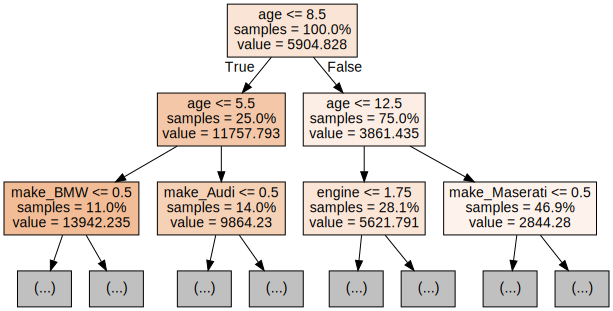

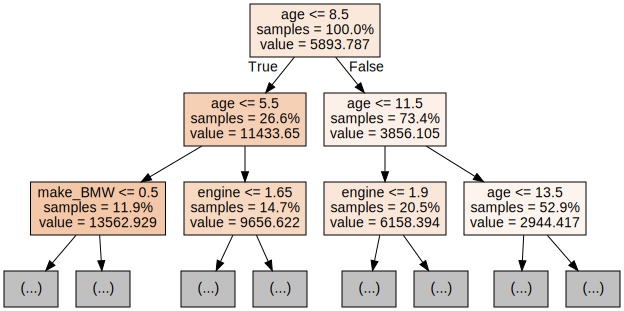

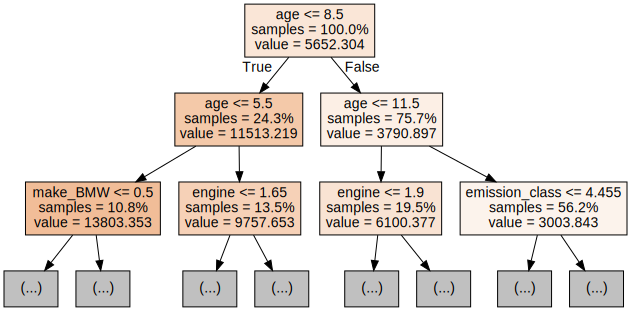

In [19]:
#Visualise trees
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [21]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
#number of trees in rf
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#number of features to consider
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(8, 110, num = 11)]
max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#method of selecting samples for training each tree
bootstrap = [True, False]
#create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [8, 18, 28, 38, 48, 59, 69, 79, 89, 99, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
rf = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [23]:
#use the random grid to search for best hyperparameters, create the base model to tune
rf = RandomForestRegressor()
#random search of parameters, 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs = -1)
#fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [8, 18, 28, 38, 48, 59, 69,
                                                      79, 89, 99, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [24]:
#show best parameters from randomizedsearchcv
(rf_random.best_params_)

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [25]:
#evaluate and fit base model
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Average Error: 847.7745.
Accuracy = 79.89%.


In [26]:
#evaluate vest random 
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 794.8542.
Accuracy = 80.10%.


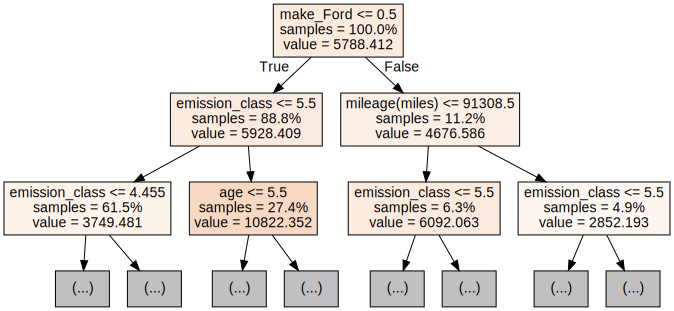

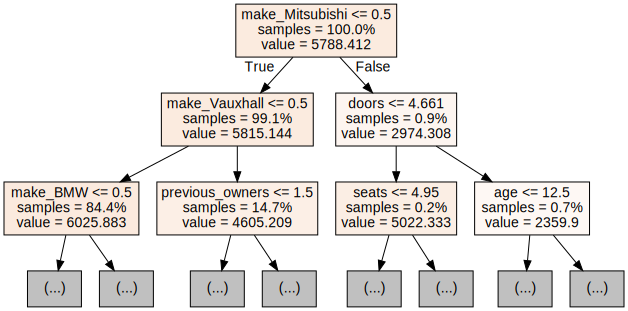

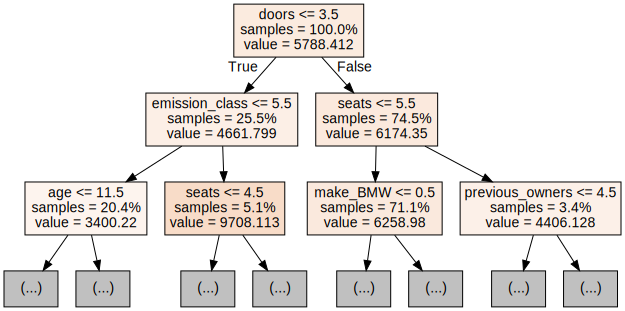

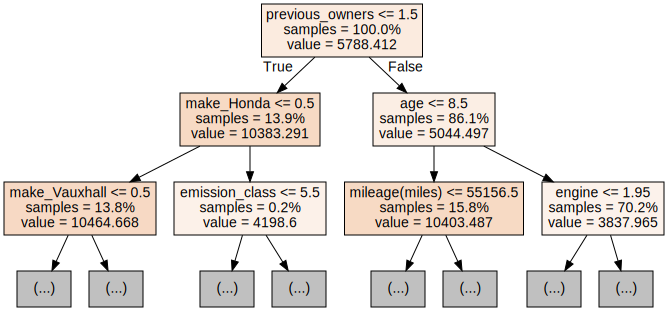

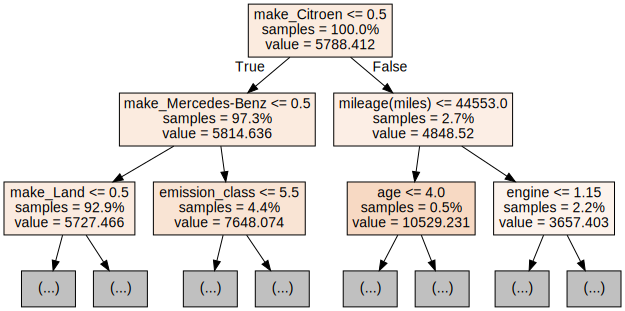

In [27]:
#Visualise tree tops of best_random
for i in range(5):
    tree = rf_random.best_estimator_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)